In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

In [3]:
DATASET_PATH = r"D:\Pneumonia_Project\chest_xray\test"

In [4]:
categories = [cat for cat in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, cat))]
print("Categories:", categories)

Categories: ['NORMAL', 'PNEUMONIA']


In [ ]:
def load_images_from_category(category, num_images=5):
    category_path = os.path.join(DATASET_PATH, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_files = image_files[:num_images]
    return [Image.open(os.path.join(category_path, img)) for img in selected_files]

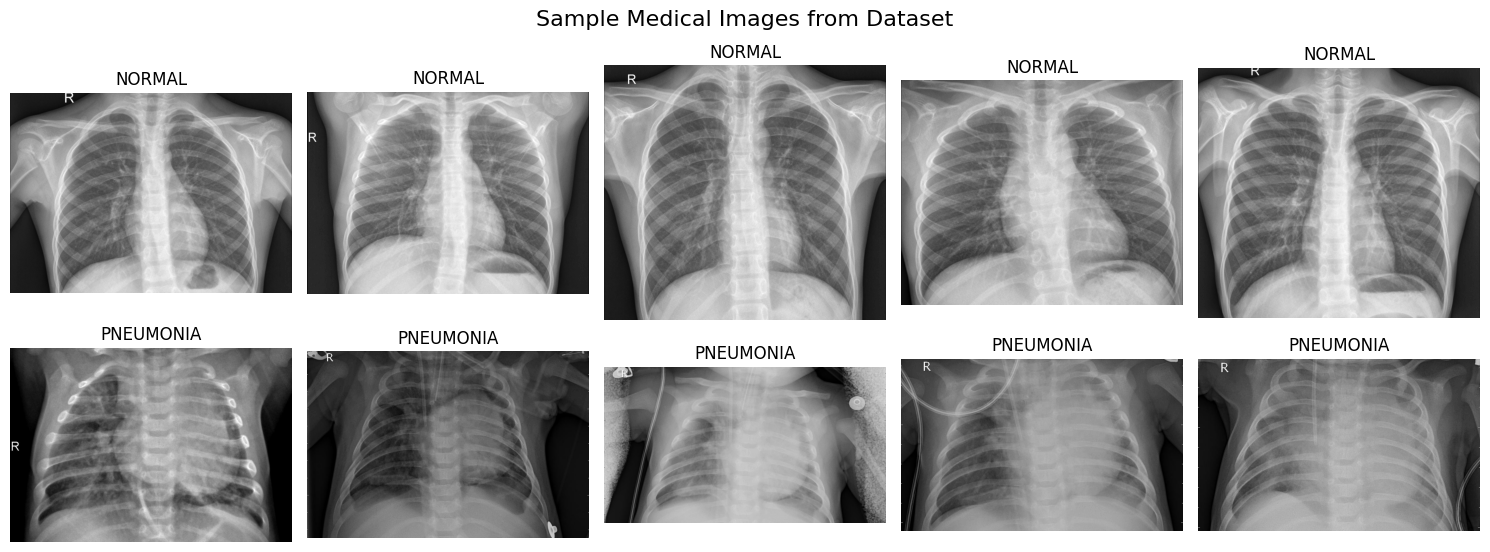

In [6]:
fig, axes = plt.subplots(len(categories), 5, figsize=(15, 3 * len(categories)))

for i, category in enumerate(categories):
    images = load_images_from_category(category)
    for j, img in enumerate(images):
        axes[i, j].imshow(img, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(category)

plt.suptitle("Sample Medical Images from Dataset", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_19452\3110728060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="coolwarm")


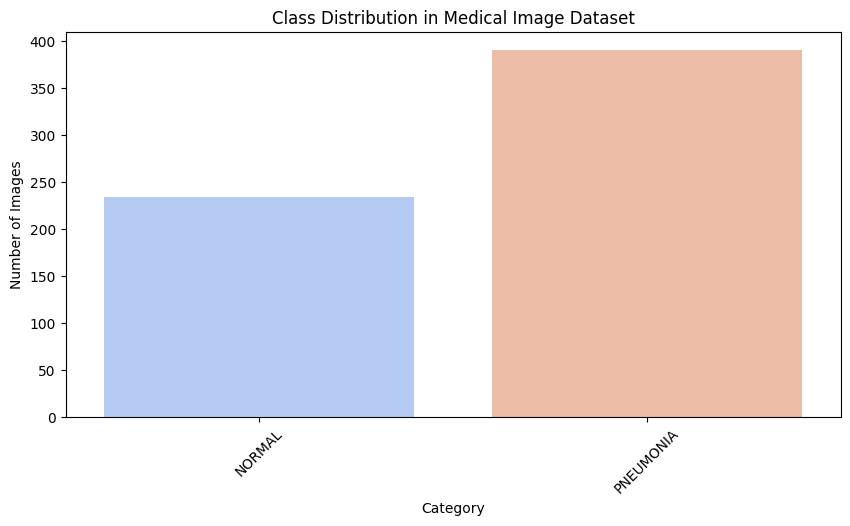

In [7]:
category_counts = {category: len(os.listdir(os.path.join(DATASET_PATH, category))) for category in categories}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Medical Image Dataset")
plt.show()


In [11]:
import cv2

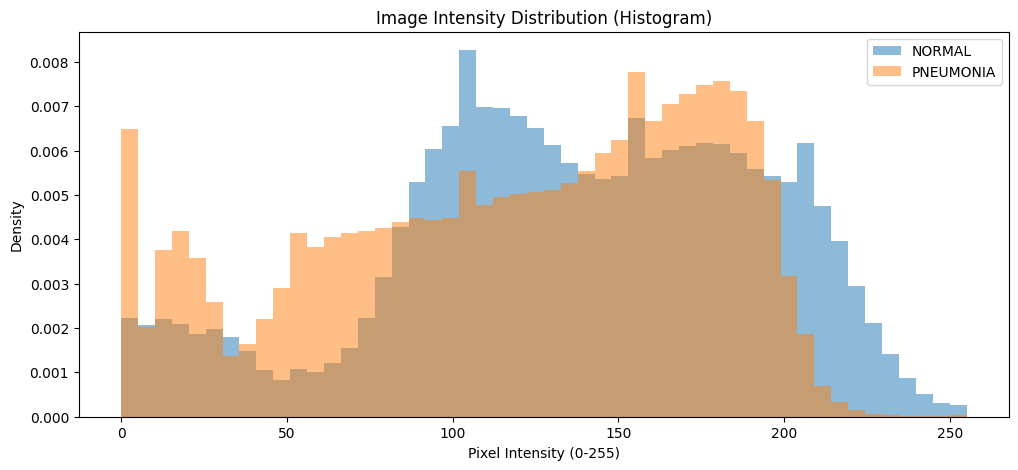

In [ ]:
def load_images_from_category(category, num_images=30, img_size=(256, 256)):
    """Load images from a given category, resize, and convert to grayscale."""
    category_path = os.path.join(DATASET_PATH, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:num_images]
    
    images = []
    for file in image_files:
        img_path = os.path.join(category_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        img = cv2.resize(img, img_size)  # Resize for consistency
        images.append(img)
    return images

plt.figure(figsize=(12, 5))

for category in categories:
    images = load_images_from_category(category, num_images=30)
    intensities = np.concatenate([img.flatten() for img in images])
    plt.hist(intensities, bins=50, alpha=0.5, label=category, density=True)  # Normalize for better comparison

plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Density")
plt.title("Image Intensity Distribution (Histogram)")
plt.legend()
plt.show()

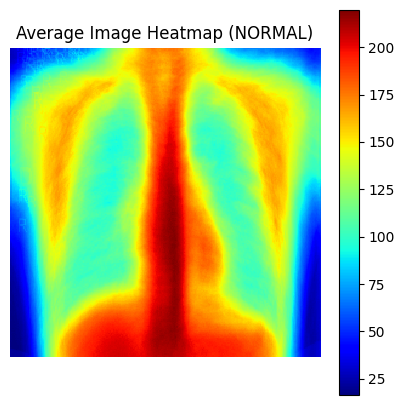

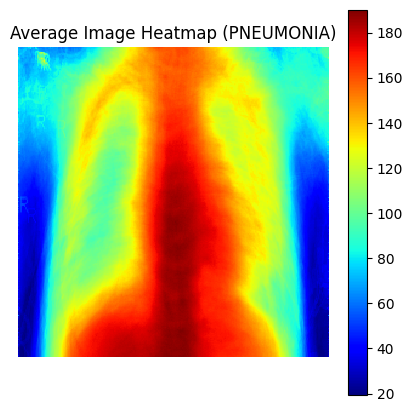

In [14]:
for category in categories:
    images = load_images_from_category(category, num_images=50)
    avg_image = np.mean([np.array(img) for img in images], axis=0)

    plt.figure(figsize=(5, 5))
    plt.imshow(avg_image, cmap="jet", interpolation="nearest")
    plt.colorbar()
    plt.title(f"Average Image Heatmap ({category})")
    plt.axis("off")
    plt.show()

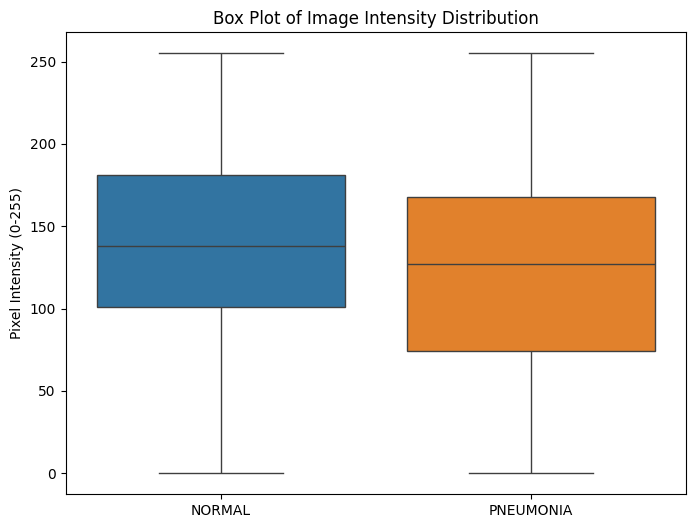

In [15]:
plt.figure(figsize=(8, 6))
data = []
labels = []

for category in categories:
    images = load_images_from_category(category, num_images=30)
    all_intensities = np.concatenate([img.flatten() for img in images])
    
    data.append(all_intensities)
    labels.append(category)

sns.boxplot(data=data)
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel("Pixel Intensity (0-255)")
plt.title("Box Plot of Image Intensity Distribution")
plt.show()

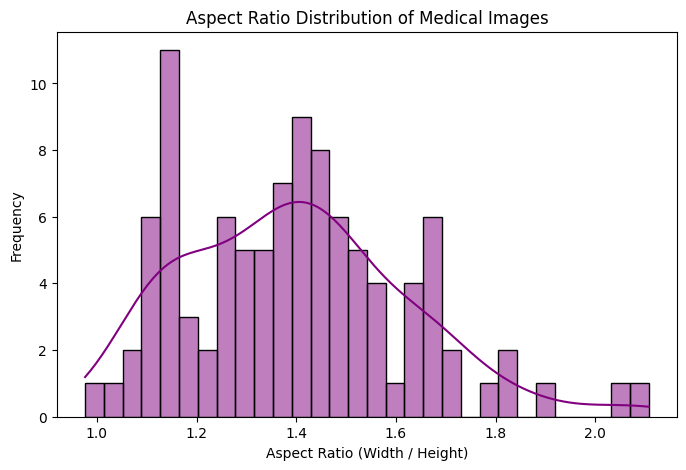

In [20]:

def load_images_from_category(category, num_images=50):
    """Load images from a given category folder."""
    DATASET_PATH = r"D:\Pneumonia_Project\chest_xray\test"
    image_folder = os.path.join(DATASET_PATH, category) 
    image_files = os.listdir(image_folder)[:num_images]
    images = []
    
    for file in image_files:
        img_path = os.path.join(image_folder, file)
        try:
            img = Image.open(img_path).convert("RGB")
            images.append(img)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return images

categories = ["NORMAL", "PNEUMONIA"] 
aspect_ratios = []

for category in categories:
    images = load_images_from_category(category, num_images=50)
    for img in images:
        if isinstance(img, Image.Image):  # Check if img is a valid PIL image
            width, height = img.size
            aspect_ratios.append(width / height)

plt.figure(figsize=(8, 5))
sns.histplot(aspect_ratios, kde=True, bins=30, color="purple")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution of Medical Images")
plt.show()